In [1]:
%matplotlib inline

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
from pyspark.sql import functions as f
from pyspark_dist_explore import  hist

In [3]:
#df_votos = pd.read_csv('votos.csv', header=0)
#df_usuarios = pd.read_csv('usuarios.csv', header=0)

#sdf_votos = sqlContext.createDataFrame(df_votos)
#sdf_usuarios = sqlContext.createDataFrame(df_usuarios)

In [13]:
sdf_votos = sqlContext.table('voto_csv')
sdf_usuarios = sqlContext.table('usuario_csv')

AnalysisException: u"Table or view 'voto_csv' not found in database 'default';"

In [5]:
sdf_votos

DataFrame[dr7objid: bigint, user_id: bigint, vote: bigint, time: double]

In [6]:
sdf_usuarios

DataFrame[user_id: bigint, age: bigint, pais: string]

In [7]:
df_usuarios.head(5)

,user_id,age,pais
0,1,39,Bolívia
1,3,40,Nicaragua
2,4,36,España
3,5,26,Argentina
4,6,28,Costa Rica


In [8]:
sdf_usuarios.show(5)

+-------+---+----------+
|user_id|age|      pais|
+-------+---+----------+
|      1| 39|  BolÃ­via|
|      3| 40| Nicaragua|
|      4| 36|   EspaÃ±a|
|      5| 26| Argentina|
|      6| 28|Costa Rica|
+-------+---+----------+
only showing top 5 rows



# Estudio y limpieza de los datos de usuario

Para empezar, vamos a mostrar algunos registros de usuarios usando el método *show*

In [29]:
sdf_usuarios.show(5)

+-------+---+----------+
|user_id|age|      pais|
+-------+---+----------+
|      1| 39|  BolÃ­via|
|      3| 40| Nicaragua|
|      4| 36|   EspaÃ±a|
|      5| 26| Argentina|
|      6| 28|Costa Rica|
+-------+---+----------+
only showing top 5 rows



Y podemos contar cuantos usuarios han participado en total usando la método *count()*.

In [30]:
sdf_usuarios.count()

14919

## País

Para empezar, vamos a generar un histograma con los paises de todos los usuarios que han participado usando las funcionalidades presentes en Spark. Para ello, ejecuta la celda siguiente:

In [9]:
hist_pais = sdf_usuarios.groupby('pais').count().toPandas()
hist_pais.head()

,pais,count
0,Paraguay,220
1,Argentina,1403
2,PerÃº,1006
3,Ecuador,534
4,Nicaragua,207


La celda anterior agrupa los usuarios según su país y luego cuenta el número de usuarios que hay en cada grupo (país).
Podemos visualizar esta información con las funcionalidades de Matplotlib que están integradas en Pandas. Ejecuta la celda siguiente para mostrar el histograma como un gráfico de barras:

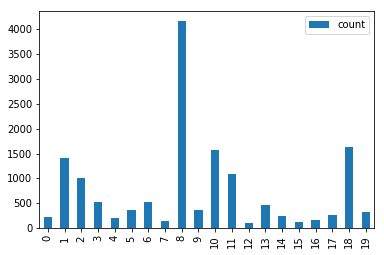

In [10]:
hist_pais.plot(kind='bar')

En el gráfico anterior, en el eje X nos muestra la posición en lugar del nombre del país. Para cambiar esto, nos conviene definir el índice del Pandas DataFrame usando el método *set_index*. Ejecuta la siguente celda para ver el resultado:

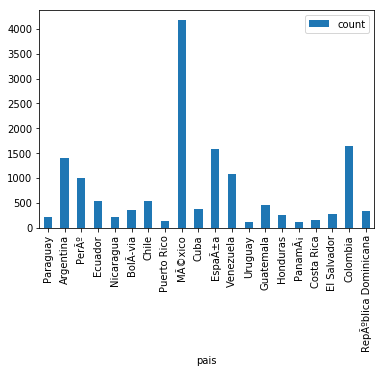

In [11]:
hist_pais.set_index('pais').plot(kind='bar')

Ahora podemos ver claramente que el país que más participantes ha tenido (más de 4000) ha sido México, y el que menos, parece ser Uruguay. Como no queda muy claro, vamos a ordenar los valores de este histograma usando el método *sort_values*. Ejecuta la celda siguiente para ver el resultado:

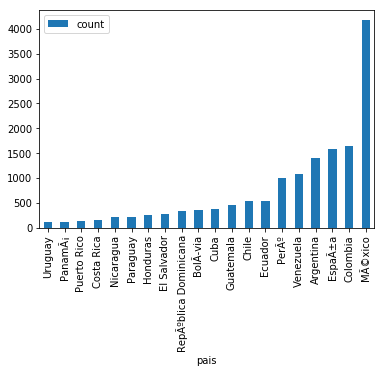

In [12]:
hist_pais.set_index('pais').sort_values('count').plot(kind='bar')

Ahora sí podemos ver claramente que Uruguay es el país que menos participantes ha tenido, aunque seguido bien de cerca por Panamá o Puerto Rico, entre otros.

## Edad

En segundo lugar, vamos a estudiar la distribución de edades de los participantes. Para ello, vamos a construir un histogramamuy similar al anterior pero, en este caso, en lugar de agrupar por país, vamos a agrupar por edad. Completa la linea siguiente para generar los datos del histograma:

In [49]:
hist_edad = sdf_usuarios.groupby(    ).count().toPandas()
hist_edad.head()

,age,count
0,29,320
1,26,186
2,65,81
3,54,229
4,19,17


Para mostrar los datos de este histograma usaremos otro tipo de gráfico, llamado "scatter". Si todo ha ido bien en la celda anterior, ejecuta la celda siguiente para visualizar el gráfico:

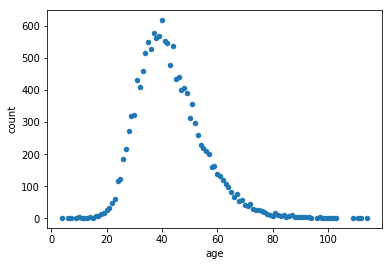

In [51]:
hist_edad.plot('age', 'count', kind='scatter')

En este gráfico podemos ver como hay participantes menores de 10 años y mayores de 100. Más adelante nos va a interesar filtrar los votos de estos usuarios, pues pueden ser poco fiables. Vamos a ver cuantos usuarios hay que tengan menos de 10 años, para ello, ejecuta la celda siguiente:

In [13]:
sdf_usuarios.filter('age < 10').count()

8

Deberías haber obtenido un resultado de 8 usuarios menores de 10 años. Para saber cuántos usuarios mayores de 100 años han participado, completa la celda siguiente y ejecútala:

In [53]:
sdf_usuarios.filter('age >    ').count()

7

Deberías haber obtenido 7 como resultado.

Finalmente, vamos a generar el conjunto de datos limpio filtrando sólo los usuarios que tengan edades comprendidas entre los 10 y los 100 años, ambos incluidos. En la celda siguiente, generamos este conjunto de datos limpio y contamos cuantos usuarios nos han quedado.

In [9]:
sdf_usuarios_limpio = sdf_usuarios.filter('age >= 10 AND age <= 100')
sdf_usuarios_limpio.count()

14904

Deberían quedarnos $14919 - 8 - 7 = 14904$

# Estudio y limpieza de los datos de votos

Una vez analizados los datos de los usuarios, vamos a hacer lo mismo con los votos. Ejecuta la celda siguiente para ver información de algunos votos:

In [32]:
sdf_votos.show(5)

+------------------+-------+----+------------------+
|          dr7objid|user_id|vote|              time|
+------------------+-------+----+------------------+
|587739829276311756|  10404|   1| 6.614253100388135|
|587744728760910031|  10404|   1| 35.48928686770822|
|587738195050823924|  10404|   0| 2.594504727852988|
|587735349639184468|  10404|   1|3.2181662463830123|
|588017726552015023|  10404|   1| 7.687655899222957|
+------------------+-------+----+------------------+
only showing top 5 rows



Y podemos contar cuantos votos hemos recodigo en total usando la método *count()*.

In [12]:
sdf_votos.count()

379149

## Tiempo de respuesta

Ahora vamos a estudiar la distribución del tiempo de respuesta, para ver cómo de rápido han sido los participantes a la hora de clasificar las galaxias según su forma.

Como puedes observar en el resultado mostrado en la celda anterior, en este caso tenemos una complejidad adicional que es el hecho de que el tiempo de respuesta no es un valor con el cual podamos agrupar directamente, ya que no es un valor categórico y cada voto tiene un tiempo de respuesta distinto.

Para poder agrupar los distintos votos, deberemos crear categorías artificiales, por ejemplo agrupando los tiempos de respuesta en bloques de un segundo. Para llevar a cabo esta agrupación podemos usar la función *floor* en la que, dado un tiempo de respuesta, nos va a devolver la parte entera despreciando la parte decimal. De esta manera, varios votos que hayan tardado 3.425, 3.019 o 3.978 segundos van a quedar agrupados en la misma categoria, los que han tardado de 3 a 4 segundos.

Vamos a generar esta columna extra con el método *withColumn* aplicando esta función *floor*. Ejecuta la celda siguiente para ver esta nueva columna:

In [33]:
sdf_votos.withColumn('segundos', f.floor('time')).show(10)

+------------------+-------+----+------------------+--------+
|          dr7objid|user_id|vote|              time|segundos|
+------------------+-------+----+------------------+--------+
|587739829276311756|  10404|   1| 6.614253100388135|       6|
|587744728760910031|  10404|   1| 35.48928686770822|      35|
|587738195050823924|  10404|   0| 2.594504727852988|       2|
|587735349639184468|  10404|   1|3.2181662463830123|       3|
|588017726552015023|  10404|   1| 7.687655899222957|       7|
|588010358014017710|  10404|   0| 9.799089880789749|       9|
|587737826752594182|  10404|   1| 5.225004023821759|       5|
|587739304222130394|  10404|   0| 5.303747019448238|       5|
|587739828736032881|  10404|   1|5.3416317469218795|       5|
|588017979433353325|  10404|   1| 21.72570525177189|      21|
+------------------+-------+----+------------------+--------+
only showing top 10 rows



Fíjate como a varios valores de la columna tiempo se les asigna el mismo número de segundos. Ahora ya sí podemos agrupar por esta columna nueva y generar el histograma.

In [20]:
hist_tiempo = sdf_votos.withColumn('segundos', f.floor('time')).groupby('segundos').count().toPandas()
hist_tiempo.head()

,segundos,count
0,26,2407
1,29,1753
2,65,101
3,191,1
4,222,1


Visualiza ahora tu mismo este mismo histograma usando un gráfico de tipo "scatter". Sólo tienes que completar la celda inferior y ejecutarla.

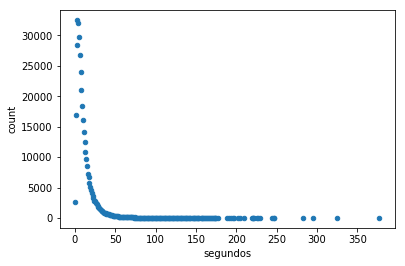

In [21]:
hist_tiempo.plot('   ', '   ', kind = '   ')

Lo primero que podemos ver en este gráfico es que parece ser que hay clasificaciones donde el usuario se ha tomado su tiempo para decidirse. Hay bastantes votos en los que el usuario ha necesitado más de 60 segundos para decidirse, incluso algunos han tardado más de 300 segundos (5 minutos). Es muy probable que no nos interese tener en cuenta estos votos, ya que la información que contienen podría ser problemática.

Calcula el número de votos que han tomado 60 segundos o más en generarse completando y ejecutando la celda siguiente:

In [42]:
sdf_votos.filter('time >=    ').count()

2866

Debería obtener el valor 2866.

Por otro lado, en la visualización anterior perdemos el detalle de lo que sucede para tiempos reducidos. Hay un parámetro *xlim* que se le puede pasar al método *plot* para especificar el rango que queremos que nos muestre en el eje X. Añade este parámetro con el valor [-1, 30] en la siguiente celda y vuelve a generar el gráfico.

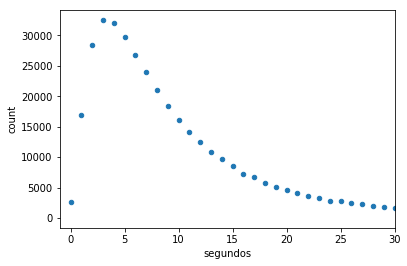

In [24]:
hist_tiempo.plot('segundos', 'count', kind = 'scatter', xlim=[-1,30])

Si lo has hecho correctamente podrás observar como hay algunas clasificaciones que se han realizado en menos de un segundo. Calcula el número de votos que se han realizado en menos de un segundo completando y ejecutando la celda siguiente:

In [43]:
sdf_votos.filter('time <    ').count()

2639

Deberías obtener el valor 2639.

Estos votos también podría interesarnos no tenerlos en cuenta, ya que es bastante probable que el usuario no le haya prestado suficiente atención.

Para ir finalizando, vamos a generar un conjunto de datos limpio que sólo contenga los votos en los que el tiempo de respuesta sea mayor de un segundo y menor de sesenta. Completa la celda inferior para generar este conjunto de datos limpio y mostrar algunos registros.

In [10]:
sdf_votos_limpio = sdf_votos.filter('time >=     AND time <=    ')
sdf_votos_limpio.show(5)

+------------------+-------+----+------------------+
|          dr7objid|user_id|vote|              time|
+------------------+-------+----+------------------+
|587739829276311756|  10404|   1| 6.614253100388135|
|587744728760910031|  10404|   1| 35.48928686770822|
|587738195050823924|  10404|   0| 2.594504727852988|
|587735349639184468|  10404|   1|3.2181662463830123|
|588017726552015023|  10404|   1| 7.687655899222957|
+------------------+-------+----+------------------+
only showing top 5 rows



Y, por último, usa el método *count* en este conjunto de datos limpio para calcular cuantos votos nos han quedado después de sanear los datos.

In [48]:
sdf_votos_limpio.count()

373644

# Combinación de los datos limpios

Ahora que tenemos los dos conjuntos de datos limpios, vamos a combinarlos para estudiarlos en su conjunto. Para ello usaremos el método *join* para combinar ambos por la columna que tienen en común, que es el identificador del usuario.

In [11]:
sdf_combinado = sdf_votos_limpio.join(sdf_usuarios_limpio, 'user_id')
sdf_combinado.show(10)

+-------+------------------+----+------------------+---+-------+
|user_id|          dr7objid|vote|              time|age|   pais|
+-------+------------------+----+------------------+---+-------+
|     26|588017703495008562|   0| 4.038737000448056| 32|EspaÃ±a|
|     26|587739844318593104|   0|  9.87130654347031| 32|EspaÃ±a|
|     26|588017564945154182|   0| 6.613958666333994| 32|EspaÃ±a|
|     26|587738950952943756|   1| 12.39630172296155| 32|EspaÃ±a|
|     26|587739720825176073|   0| 8.738422064682776| 32|EspaÃ±a|
|     26|588007005808165242|   1| 5.182049594994755| 32|EspaÃ±a|
|     26|587739809411629186|   1| 3.608297215301159| 32|EspaÃ±a|
|     26|587725551738290318|   0| 5.429941178281077| 32|EspaÃ±a|
|     26|587742014900863086|   0| 13.98506354970279| 32|EspaÃ±a|
|     26|587729228758778038|   0|5.3553286734502334| 32|EspaÃ±a|
+-------+------------------+----+------------------+---+-------+
only showing top 10 rows



Al combinar estos dos conjuntos de datos vamos a generar un conjunto de datos aún más limpio, ya que en la combinación se van a descartar todos los votos de aquellos usuarios que hemos filtrado por estar fuera del rango de edad.

Calcula el número de registros del conjunto de datos combinados con el método *count*.

In [50]:
sdf_combinado.count()

373451

Deberías obtener el resultado 373451, lo que nos indica que en la combinación de los dos conjuntos de datos, se han descartado $373644 - 373451 = 193$ votos adicionales.

Ahora que tenemos los datos combinados, podemos sacar información adicional sobre estos datos. Por ejemplo, podemos calcular el histograma de número de votos por país, o por franja de edad. En la celda siguiente tienes el código para generar los datos para el histograma del número de votos por país.

In [55]:
sdf_combinado.groupby('pais').count().toPandas()#.plot(kind='bar')

Py4JJavaError: An error occurred while calling o481.collectToPython.
: org.apache.spark.sql.catalyst.errors.package$TreeNodeException: execute, tree:
Exchange hashpartitioning(pais#11, 200)
+- *HashAggregate(keys=[pais#11], functions=[partial_count(1)], output=[pais#11, count#378L])
   +- *Project [pais#11]
      +- *SortMergeJoin [user_id#1L], [user_id#9L], Inner
         :- *Sort [user_id#1L ASC NULLS FIRST], false, 0
         :  +- Exchange hashpartitioning(user_id#1L, 200)
         :     +- *Project [user_id#1L]
         :        +- *Filter (((isnotnull(time#3) && (time#3 >= 1.0)) && (time#3 <= 60.0)) && isnotnull(user_id#1L))
         :           +- Scan ExistingRDD[dr7objid#0L,user_id#1L,vote#2L,time#3]
         +- *Sort [user_id#9L ASC NULLS FIRST], false, 0
            +- Exchange hashpartitioning(user_id#9L, 200)
               +- *Project [user_id#9L, pais#11]
                  +- *Filter (((isnotnull(age#10L) && (age#10L >= 10)) && (age#10L <= 100)) && isnotnull(user_id#9L))
                     +- Scan ExistingRDD[user_id#9L,age#10L,pais#11]

	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:56)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange.doExecute(ShuffleExchange.scala:112)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:235)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.inputRDDs(HashAggregateExec.scala:141)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:368)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:225)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:272)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply$mcI$sp(Dataset.scala:2768)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2765)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2765)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:2765)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.sql.catalyst.errors.package$TreeNodeException: execute, tree:
Exchange hashpartitioning(user_id#1L, 200)
+- *Project [user_id#1L]
   +- *Filter (((isnotnull(time#3) && (time#3 >= 1.0)) && (time#3 <= 60.0)) && isnotnull(user_id#1L))
      +- Scan ExistingRDD[dr7objid#0L,user_id#1L,vote#2L,time#3]

	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:56)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange.doExecute(ShuffleExchange.scala:112)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:235)
	at org.apache.spark.sql.execution.SortExec.inputRDDs(SortExec.scala:121)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:368)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.InputAdapter.doExecute(WholeStageCodegenExec.scala:227)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.joins.SortMergeJoinExec.inputRDDs(SortMergeJoinExec.scala:336)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:42)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.inputRDDs(HashAggregateExec.scala:141)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:368)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:114)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:135)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:132)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:113)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange.prepareShuffleDependency(ShuffleExchange.scala:85)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$$anonfun$doExecute$1.apply(ShuffleExchange.scala:121)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$$anonfun$doExecute$1.apply(ShuffleExchange.scala:112)
	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:52)
	... 35 more
Caused by: java.lang.NullPointerException
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$.needToCopyObjectsBeforeShuffle(ShuffleExchange.scala:159)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$.prepareShuffleDependency(ShuffleExchange.scala:243)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange.prepareShuffleDependency(ShuffleExchange.scala:84)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$$anonfun$doExecute$1.apply(ShuffleExchange.scala:121)
	at org.apache.spark.sql.execution.exchange.ShuffleExchange$$anonfun$doExecute$1.apply(ShuffleExchange.scala:112)
	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:52)
	... 72 more


Para empezar, vamos a generar un histograma con las edades de todos los usuarios, usando las funcionalidades presentes en Spark. Para ello, ejecuta la celda siguiente

In [31]:
hist_edad = sdf_usuarios.groupby('age').count().toPandas()
hist_edad.head()

,age,count
0,26,186
1,29,320
2,65,81
3,54,229
4,19,17


<IPython.core.display.Javascript object>


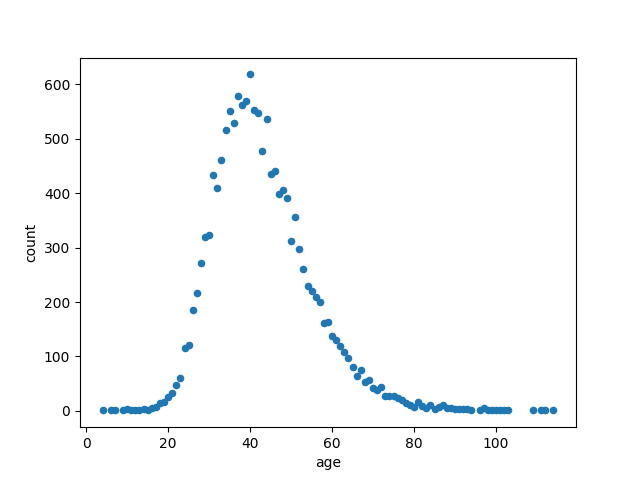

In [32]:
hist_edad.plot('age', 'count', kind='scatter')

<IPython.core.display.Javascript object>


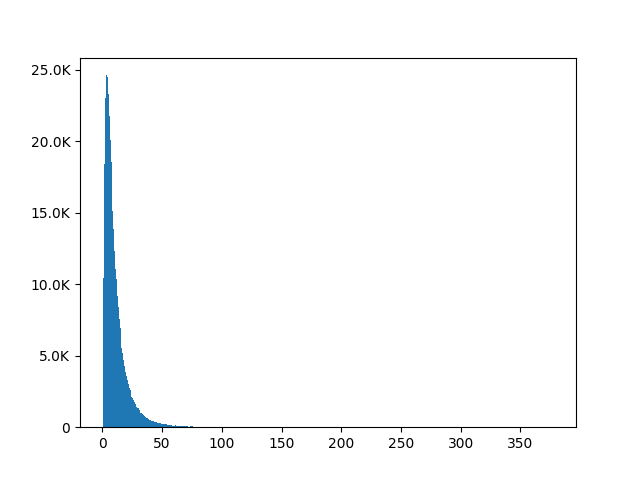

(array([1.9230e+03, 1.0404e+04, 1.8391e+04, 2.3010e+04, 2.4605e+04,
        2.4495e+04, 2.3280e+04, 2.1737e+04, 2.0086e+04, 1.8544e+04,
        1.6724e+04, 1.5087e+04, 1.3824e+04, 1.2338e+04, 1.1082e+04,
        1.0335e+04, 9.1900e+03, 8.3880e+03, 7.5680e+03, 6.9540e+03,
        6.3340e+03, 5.5250e+03, 5.1790e+03, 4.6780e+03, 4.2600e+03,
        3.8470e+03, 3.5620e+03, 3.3300e+03, 3.0000e+03, 2.7450e+03,
        2.6170e+03, 2.3060e+03, 2.1180e+03, 2.0550e+03, 1.9010e+03,
        1.7530e+03, 1.6150e+03, 1.4300e+03, 1.3610e+03, 1.3080e+03,
        1.2260e+03, 1.1320e+03, 1.0000e+03, 9.8100e+02, 8.9300e+02,
        8.2400e+02, 7.6600e+02, 7.0500e+02, 6.6200e+02, 6.6900e+02,
        6.0800e+02, 5.6700e+02, 5.2400e+02, 4.8800e+02, 4.6100e+02,
        4.3900e+02, 4.1600e+02, 3.8800e+02, 3.7100e+02, 3.3300e+02,
        3.1600e+02, 3.0500e+02, 2.9300e+02, 2.6000e+02, 2.6200e+02,
        2.5700e+02, 2.2700e+02, 2.0400e+02, 2.3800e+02, 1.9500e+02,
        2.0800e+02, 1.6900e+02, 1.5100e+02, 1.55

In [29]:
fig, ax = plt.subplots()
hist(ax, sdf_votos.select(f.col('time')), bins=500)